In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [21]:
df.drop('CustomerID',axis=1,inplace=True)

In [22]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 0, 'Annual Income (k$)')

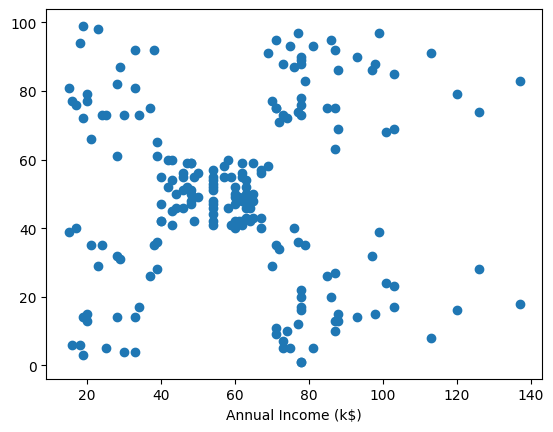

In [23]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')

<Axes: >

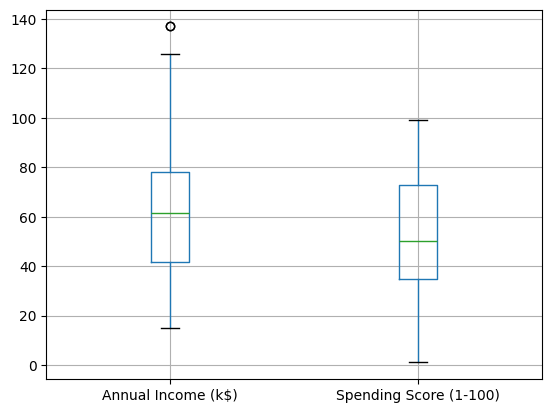

In [24]:
df.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7d8638e43620>,
 'caps': [<matplotlib.lines.Line2D at 0x7d8638e439e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d8638e433e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d8638e43f20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d8636c74260>],
 'means': []}

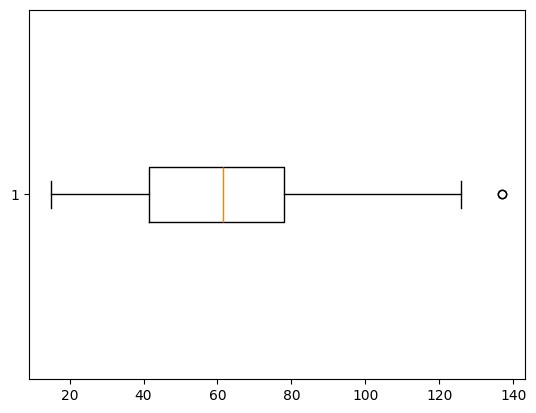

In [25]:
plt.boxplot(df['Annual Income (k$)'], vert=False)

In [26]:
# Remove outliers

q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

df.drop(df[df['Annual Income (k$)'] < lower_limit ].index, inplace=True)
df.drop(df[df['Annual Income (k$)'] > upper_limit ].index, inplace=True)

<Axes: >

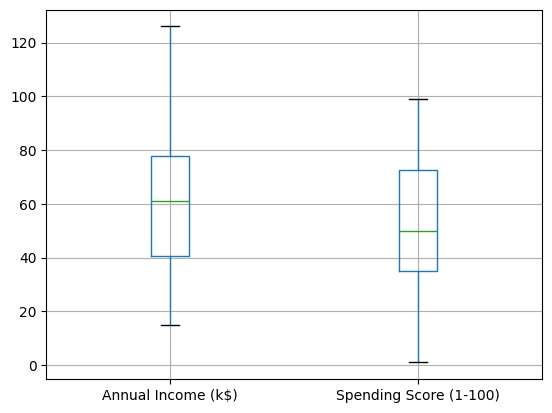

In [27]:
df.boxplot()

In [28]:
from sklearn.cluster import KMeans

In [29]:
# elbow method for optimal k
x = df
x.shape

(198, 2)

Text(0, 0.5, '*** WCSS ***')

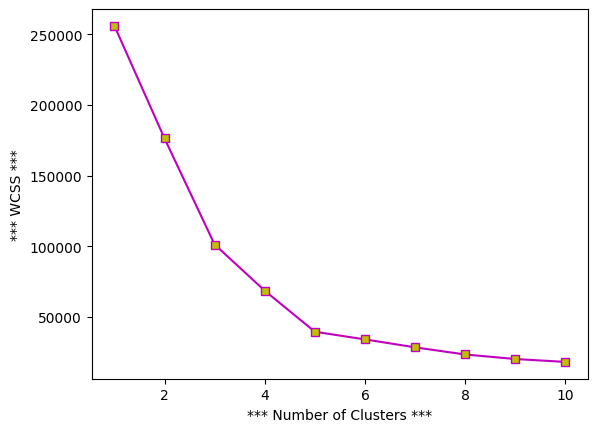

In [44]:
k = np.arange(1,11)
wcss = []
for i in k:
  model = KMeans(n_clusters=i)
  model.fit(x)
  wcss.append(model.inertia_)

plt.plot(k,wcss,marker='s',c='m',mfc='y')
plt.xlabel('*** Number of Clusters ***')
plt.ylabel('*** WCSS ***')


In [46]:
finalmodel = KMeans(n_clusters=5)
finalmodel.fit(x)
yhat = finalmodel.predict(x)  ; yhat

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
      dtype=int32)

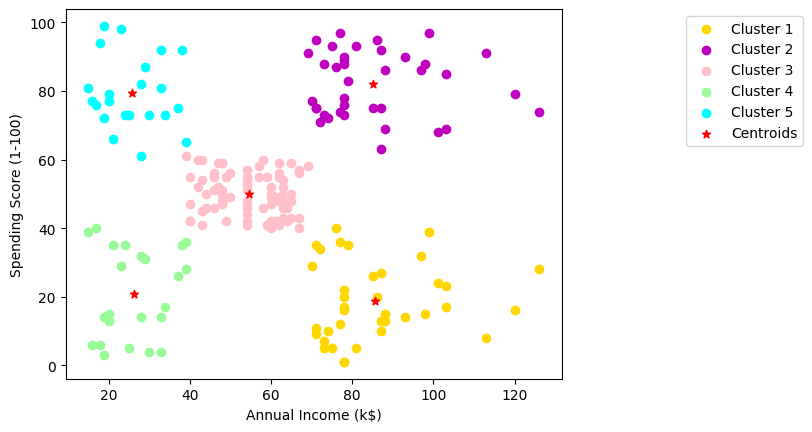

In [58]:
plt.scatter(df.iloc[yhat==0, 0], df.iloc[yhat==0, 1],
            label='Cluster 1', c='gold')

plt.scatter(df.iloc[yhat==1, 0], df.iloc[yhat==1, 1],
            label='Cluster 2', c='m')

plt.scatter(df.iloc[yhat==2, 0], df.iloc[yhat==2, 1],
            label='Cluster 3', c='pink')

plt.scatter(df.iloc[yhat==3, 0], df.iloc[yhat==3, 1],
            label='Cluster 4', c='palegreen')

plt.scatter(df.iloc[yhat==4, 0], df.iloc[yhat==4, 1],
            label='Cluster 5', c='cyan')

plt.scatter(finalmodel.cluster_centers_[:, 0],
            finalmodel.cluster_centers_[:, 1],
            label='Centroids', c='red', marker='*')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.5,1))